In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading csv file
df = pd.read_csv("myfile.csv")

# Displaying  first 5 rows
print(df.head())

   year  month carrier       carrier_name airport  \
0  2023     12      9E  Endeavor Air Inc.     ABE   
1  2023     12      9E  Endeavor Air Inc.     AEX   
2  2023     12      9E  Endeavor Air Inc.     AGS   
3  2023     12      9E  Endeavor Air Inc.     ALB   
4  2023     12      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         72.0        5.0   
1           Alexandria, LA: Alexandria International         62.0        7.0   
2        Augusta, GA: Augusta Regional at Bush Field         95.0       10.0   
3                   Albany, NY: Albany International         23.0        2.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2111.0      256.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.46        1.00  ...          0.0              0.81            0.0   
1        4.25        0.00  ...          

In [ ]:
# General Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

so , carrier_name , carrier, ariport , airport_name are of object type

In [ ]:
# Missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64


In [ ]:
df.shape

(179338, 21)

Shape before dropping missing values columns , since the missing value columns are not in large number compared to total we can easily drop.

In [ ]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [ ]:
df.shape

(178747, 21)

As we can see, not much change in number of rows

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 178747 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 178747 non-null  int64  
 1   month                178747 non-null  int64  
 2   carrier              178747 non-null  object 
 3   carrier_name         178747 non-null  object 
 4   airport              178747 non-null  object 
 5   airport_name         178747 non-null  object 
 6   arr_flights          178747 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178747 non-null  float64
 9   weather_ct           178747 non-null  float64
 10  nas_ct               178747 non-null  float64
 11  security_ct          178747 non-null  float64
 12  late_aircraft_ct     178747 non-null  float64
 13  arr_cancelled        178747 non-null  float64
 14  arr_diverted         178747 non-null  float64
 15  arr_delay            1

In [ ]:
print(df['year'].unique())
print(df['month'].unique())


[2023 2022 2021 2020 2019 2018 2017 2016 2015]
[12 11 10  9  8  7  6  5  4  3  2  1]


So, we have data available from 2015 to 2023 and of all months

In [ ]:
monthly_flights = df.groupby(['year', 'month'])['arr_flights'].sum().reset_index()

# Optional: format as "YYYY/MM"
monthly_flights['year_month'] = monthly_flights['year'].astype(str) + '/' + monthly_flights['month'].astype(str).str.zfill(2)

# Sort chronologically
monthly_flights = monthly_flights.sort_values(by=['year', 'month'])

# Display
print(monthly_flights[['year_month', 'arr_flights']])


    year_month  arr_flights
0      2015/01     469967.0
1      2015/02     429191.0
2      2015/03     504311.0
3      2015/04     485151.0
4      2015/05     496993.0
..         ...          ...
103    2023/08     640235.0
104    2023/09     604715.0
105    2023/10     635538.0
106    2023/11     599814.0
107    2023/12     606218.0

[108 rows x 2 columns]


Not much to observe, just for checking if all months from all years are available, since 9*12 =108 , which means all months are present since we had 9 years

In [ ]:
print(df['carrier'].unique())
print(df['carrier'].nunique())


['9E' 'AA' 'OH' 'OO' 'WN' 'AS' 'DL' 'PT' 'QX' 'UA' 'YV' 'B6' 'F9' 'G4'
 'G7' 'HA' 'MQ' 'YX' 'ZW' 'C5' 'NK' 'EM' 'EV' 'AX' 'CP' 'KS' '9K' 'VX'
 'US']
29


In [ ]:
print(df['carrier_name'].nunique())


39


the number of carrier names is more than carrier codes , which means some carrier codes map to same name.

In [ ]:
print(df['airport_name'].nunique())

417


In [ ]:
print(df['airport'].nunique())

393


In [ ]:
df[df.duplicated(['airport', 'airport_name']) == False].groupby('airport')['airport_name'].unique()


,airport_name
airport,
ABE,"[Allentown/Bethlehem/Easton, PA: Lehigh Valley..."
ABI,"[Abilene, TX: Abilene Regional]"
ABQ,"[Albuquerque, NM: Albuquerque International Su..."
ABR,"[Aberdeen, SD: Aberdeen Regional]"
ABY,"[Albany, GA: Southwest Georgia Regional]"
...,...
XWA,"[Williston, ND: Williston Basin International]"
YAK,"[Yakutat, AK: Yakutat Airport]"
YKM,"[Yakima, WA: Yakima Air Terminal/McAllister Fi..."


In [ ]:
# Count how many airport codes map to multiple different names
df.groupby('airport')['airport_name'].nunique().sort_values(ascending=False).head()


,airport_name
airport,
ROW,2
ROC,2
ROA,2
RIW,2
HYA,2


In [ ]:
carrier_name_variants = df.groupby('carrier')['carrier_name'].nunique()

# Count how many carriers have more than one unique name
num_multi_named_carriers = (carrier_name_variants > 1).sum()

print(f"Number of carrier codes with more than one unique name: {num_multi_named_carriers}")

Number of carrier codes with more than one unique name: 10


In [ ]:
df.groupby('carrier')['carrier_name'].nunique().sort_values(ascending=False).head()


,carrier_name
carrier,
AA,2
AS,2
F9,2
DL,2
C5,2


In [ ]:
# Group by carrier and get unique carrier names
carrier_name_variants = df.groupby('carrier')['carrier_name'].unique()

# Filter to only those with more than one unique name
multi_named_carriers = carrier_name_variants[carrier_name_variants.apply(len) > 1]

# Show the result
print(multi_named_carriers)


carrier
AA    [American Airlines Network, American Airlines ...
AS      [Alaska Airlines Network, Alaska Airlines Inc.]
C5    [CommuteAir LLC dba CommuteAir, Commutair Aka ...
DL      [Delta Air Lines Network, Delta Air Lines Inc.]
EV    [ExpressJet Airlines LLC, ExpressJet Airlines ...
F9          [Frontier Airlines, Frontier Airlines Inc.]
HA    [Hawaiian Airlines Network, Hawaiian Airlines ...
NK                  [Spirit Airlines, Spirit Air Lines]
UA    [United Air Lines Network, United Air Lines Inc.]
WN         [Southwest Airlines, Southwest Airlines Co.]
Name: carrier_name, dtype: object


So the 1 to 2 mappings are mainly due to mergers,acquisitions,etc. for example AS is Alaska Airlines Network, Alaska Airlines Inc. Thus we can safely remove the name coulmns and only keep codes column which we will latter encode.

In [ ]:
df.drop(columns=['carrier_name', 'airport_name'], inplace=True)


As seen from most research papers, the state of art model is xg boost for flight delay prediction, so we will be starting from that , keeping that in mind we can proceed with label encoding instead of say one hot since xg boost handles that well. But we will do the encoding just before training not now .

In [ ]:
print(df.columns)


Index(['year', 'month', 'carrier', 'airport', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')


In [ ]:
df.shape

(178747, 19)

In [ ]:
df['arr_del15'].nunique()

1692

In [ ]:
df['arr_del15'].unique()

array([   5.,    7.,   10., ..., 2031., 1854., 1183.])

# Using rolling averages

For the classification task ,i initially used arr_del15 / arr_flights as target  since it would indicate total number of flights delayed per flight , and if this ratio is greater than some threshold , which means on average a flight is delayed , then i would return 1 else 0 and then check accuracy ,precision, f1 score based on this, but for train features i thought the data like arr_delay , all delays,all cts ,etc should be given but it should not be given for test set since it would not mean a predictive model (as we want to tell if the next flight (on average according to month) will delay or not ) so i thought how can we give all types of delay counts and delay hours of that month , it be sort of like time series and then i started with rolling averages.

In [ ]:
df1 = df.copy()

Since i didnt want to change the preprocessed dataframe

In [ ]:
monthly_df = df1.groupby(['year', 'month', 'carrier', 'airport']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()

In [ ]:
# Creating target = delay rate
monthly_df['delay_rate'] = monthly_df['arr_del15'] / monthly_df['arr_flights']

# Defining binary target (1 if ≥ 20% of flights delayed)
monthly_df['target'] = (monthly_df['delay_rate'] >= 0.2).astype(int)

# Sort for lag creation
monthly_df = monthly_df.sort_values(by=['carrier', 'airport', 'year', 'month'])


In [ ]:
monthly_df['prev_month_flights'] = monthly_df.groupby(['carrier', 'airport'])['arr_flights'].shift(1)
monthly_df['prev_month_delay_rate'] = monthly_df.groupby(['carrier', 'airport'])['delay_rate'].shift(1)

monthly_df['rolling_3mo_delay'] = (
    monthly_df
    .groupby(['carrier', 'airport'])['delay_rate']
    .rolling(window=3).mean().shift(1).reset_index(level=[0, 1], drop=True)
)
# Drop rows with missing lag values
monthly_df.dropna(inplace=True)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

le_carrier = LabelEncoder()
le_airport = LabelEncoder()

monthly_df['carrier_encoded'] = le_carrier.fit_transform(monthly_df['carrier'])
monthly_df['airport_encoded'] = le_airport.fit_transform(monthly_df['airport'])

In [ ]:

# Define features and target
features = ['year', 'month', 'carrier_encoded', 'airport_encoded',
            'prev_month_flights', 'prev_month_delay_rate', 'rolling_3mo_delay']
X = monthly_df[features]
y = monthly_df['target']



In [ ]:
# Force first 3 months of 2015 into the test set
test_mask = (monthly_df['year'] == 2015) & (monthly_df['month'].isin([1, 2, 3]))
holdout_test = monthly_df[test_mask]
holdout_X = holdout_test[features]
holdout_y = holdout_test['target']

# Remaining data (excluding forced test)
remaining = monthly_df[~test_mask].sort_values(by=['year', 'month'])


For Jan–Mar 2015, there's no past data available

Shifted or rolling features will be unreliable

Training on rows with incomplete historical context can confuse the model

So it's safer to exclude them from training

In [ ]:
 #Time-aware split: 80% train, 20% test
train_size = int(len(remaining) * 0.8)
train_data = remaining.iloc[:train_size]
test_data = pd.concat([remaining.iloc[train_size:], holdout_test])

Time-respecting train-test split	remaining.iloc[:train_size] (oldest) vs remaining.iloc[train_size:] (newest)

# Classification

In [ ]:
X_train = train_data[features]
y_train = train_data['target']
X_test = test_data[features]
y_test = test_data['target']

# Train XGBoost with imbalance handling
imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

model = xgb.XGBClassifier(
    eval_metric='aucpr',
    scale_pos_weight=imbalance_ratio,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69     18639
           1       0.63      0.79      0.70     15226

    accuracy                           0.69     33865
   macro avg       0.70      0.70      0.69     33865
weighted avg       0.71      0.69      0.69     33865

 Confusion Matrix:
 [[11487  7152]
 [ 3203 12023]]
 ROC AUC Score: 0.7890686065236663


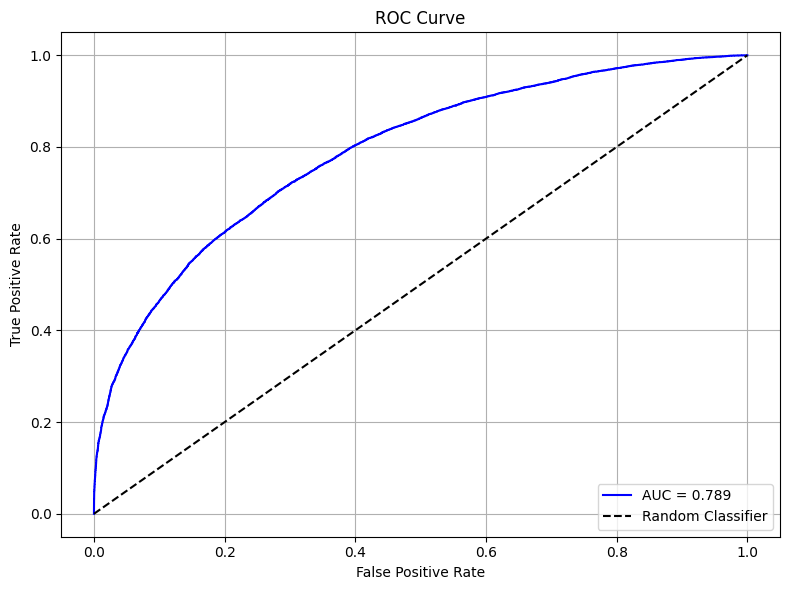

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Comdputing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# Regression

In [ ]:
monthly_df = df1.groupby(['year', 'month', 'carrier', 'airport']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_delay': 'sum'  # ✅ Add this line
}).reset_index()



In [ ]:
monthly_df['delay_rate_minutes'] = monthly_df['arr_delay'] / monthly_df['arr_flights']


In [ ]:
# Sort for time-aware lag creation
monthly_df = monthly_df.sort_values(by=['carrier', 'airport', 'year', 'month'])

# Lag features
monthly_df['prev_month_flights'] = monthly_df.groupby(['carrier', 'airport'])['arr_flights'].shift(1)
monthly_df['prev_month_delay_rate'] = monthly_df.groupby(['carrier', 'airport'])['delay_rate_minutes'].shift(1)

# Rolling average of delay rate (past 3 months)
monthly_df['rolling_3mo_delay'] = (
    monthly_df
    .groupby(['carrier', 'airport'])['delay_rate_minutes']
    .rolling(window=3).mean()
    .shift(1)
    .reset_index(level=[0, 1], drop=True)
)

# Drop rows with missing history
monthly_df.dropna(inplace=True)

# Label encode categorical features
from sklearn.preprocessing import LabelEncoder

le_carrier = LabelEncoder()
le_airport = LabelEncoder()
monthly_df['carrier_encoded'] = le_carrier.fit_transform(monthly_df['carrier'])
monthly_df['airport_encoded'] = le_airport.fit_transform(monthly_df['airport'])


In [ ]:
features = [
    'year', 'month',
    'carrier_encoded', 'airport_encoded',
    'prev_month_flights',
    'prev_month_delay_rate',
    'rolling_3mo_delay'
]
X = monthly_df[features]
y = monthly_df['delay_rate_minutes']

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 0.3587549030780792


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {mse ** 0.5:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.1894
RMSE: 0.4352
R²: 0.2343


# Improving the model

Since i have used only the basic features till now , i will be using other features provided in the initial dataset (and do rolling average on them)

In [ ]:
monthly_df = df1.groupby(['year', 'month', 'carrier', 'airport']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_delay': 'sum',
    'carrier_ct': 'sum',
    'carrier_delay': 'sum',
    'weather_ct': 'sum',
    'weather_delay': 'sum',
    'nas_ct': 'sum',
    'nas_delay': 'sum',
    'security_ct': 'sum',
    'security_delay': 'sum',
    'late_aircraft_ct': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()


In [ ]:

# Derived columns
monthly_df['delay_rate'] = monthly_df['arr_del15'] / monthly_df['arr_flights']
monthly_df['delay_rate_minutes'] = monthly_df['arr_delay'] / monthly_df['arr_flights']
monthly_df['target_class'] = (monthly_df['delay_rate'] >= 0.2).astype(int)  # classification label

# Sort chronologically
monthly_df = monthly_df.sort_values(by=['carrier', 'airport', 'year', 'month'])

# Create lag and rolling features
delay_features = [
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'
]

for col in delay_features:
    monthly_df[f'prev_{col}'] = monthly_df.groupby(['carrier', 'airport'])[col].shift(1)
    monthly_df[f'roll3_{col}'] = (
        monthly_df.groupby(['carrier', 'airport'])[col]
        .rolling(window=3).mean()
        .shift(1)
        .reset_index(level=[0, 1], drop=True)
    )

# Also include previous flight volume and delay rate
monthly_df['prev_month_flights'] = monthly_df.groupby(['carrier', 'airport'])['arr_flights'].shift(1)
monthly_df['prev_month_delay_rate'] = monthly_df.groupby(['carrier', 'airport'])['delay_rate'].shift(1)
monthly_df['roll3_delay_rate'] = (
    monthly_df.groupby(['carrier', 'airport'])['delay_rate']
    .rolling(3).mean().shift(1).reset_index(level=[0, 1], drop=True)
)

# Drop rows with insufficient history
monthly_df.dropna(inplace=True)

# Encode carrier and airport
le_carrier = LabelEncoder()
le_airport = LabelEncoder()
monthly_df['carrier_encoded'] = le_carrier.fit_transform(monthly_df['carrier'])
monthly_df['airport_encoded'] = le_airport.fit_transform(monthly_df['airport'])

# Common feature list
base_features = ['year', 'month', 'carrier_encoded', 'airport_encoded',
                 'prev_month_flights', 'prev_month_delay_rate', 'roll3_delay_rate']
engineered_features = [f'prev_{col}' for col in delay_features] + [f'roll3_{col}' for col in delay_features]
all_features = base_features + engineered_features


In [ ]:
# Classification
X_cls = monthly_df[all_features]
y_cls = monthly_df['target_class']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, stratify=y_cls, test_size=0.2, random_state=42)

imb_ratio = y_train_cls.value_counts()[0] / y_train_cls.value_counts()[1]

clf = xgb.XGBClassifier(
    eval_metric='aucpr',
    scale_pos_weight=imb_ratio,
    random_state=42
)

clf.fit(X_train_cls, y_train_cls)

# Evaluate classification
y_pred_cls = clf.predict(X_test_cls)
y_prob_cls = clf.predict_proba(X_test_cls)[:, 1]

print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
print("ROC AUC Score:", roc_auc_score(y_test_cls, y_prob_cls))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80     21257
           1       0.66      0.77      0.71     12608

    accuracy                           0.77     33865
   macro avg       0.75      0.77      0.76     33865
weighted avg       0.78      0.77      0.77     33865

Confusion Matrix:
 [[16260  4997]
 [ 2959  9649]]
ROC AUC Score: 0.8510618624375512


In [ ]:
# Regression
X_reg = monthly_df[all_features]
y_reg = monthly_df['delay_rate_minutes']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42
)
reg.fit(X_train_reg, y_train_reg)

# Evaluate regression
y_pred_reg = reg.predict(X_test_reg)

print("📈 Regression Evaluation")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("RMSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R²:", r2_score(y_test_reg, y_pred_reg))


📈 Regression Evaluation
MAE: 5.403966322646516
RMSE: 110.13240654785902
R²: 0.17575858336754624


# Conclusion(for now)

As we can see the classification results become better after adding these features whereas regression results fall behind ,Regression asks:

Exactly how many minutes of delay will there be per flight this month?

This is a fine-grained, continuous prediction.

When i added the same features i added noisy variables (like prev_nas_ct) that don’t linearly relate to delay magnitude

Past delay reasons (e.g. weather, NAS) don’t translate well into accurate future delay values

Some delay features (e.g. carrier_ct) can vary wildly — introducing variance without signal

So the model becomes overcomplicated, and struggles to learn a clean pattern.
whereas classification is much simpler binary task and the model can easily infer from the recent past(as we have taken in rolling window)



# Trying SHAP

In [ ]:
pip install shap


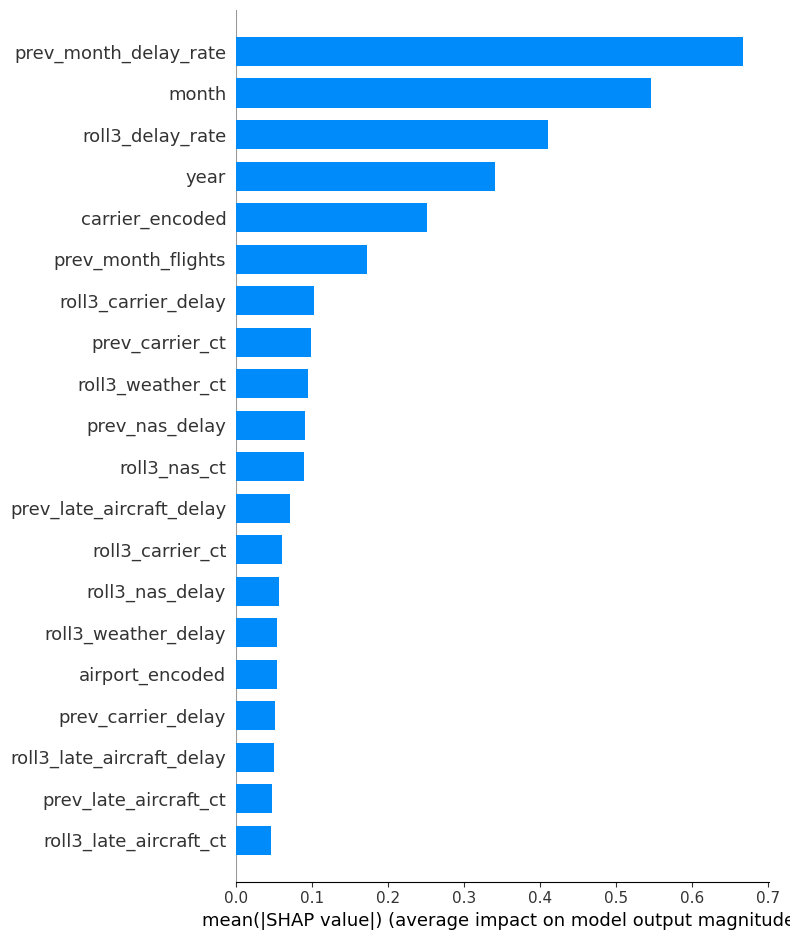

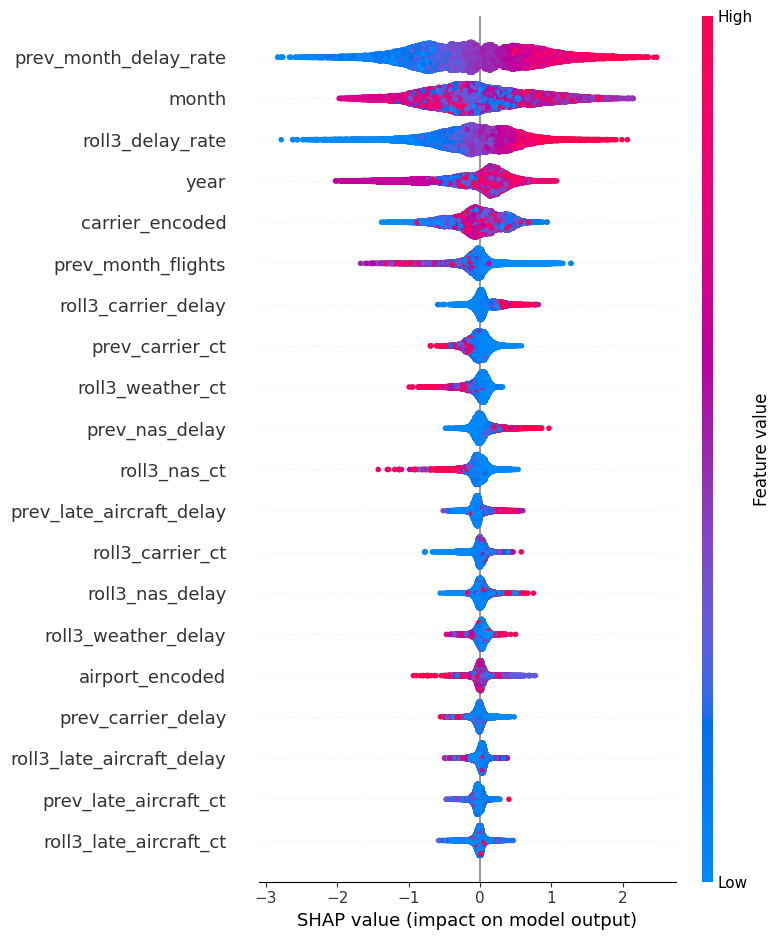

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP for classification model
explainer_cls = shap.Explainer(clf)  # clf = your trained XGBClassifier
shap_values_cls = explainer_cls(X_test_cls)

# Summary plot: global feature importance
shap.summary_plot(shap_values_cls, X_test_cls, plot_type="bar", show=True)

# Optional: detailed distribution per feature
shap.summary_plot(shap_values_cls, X_test_cls)


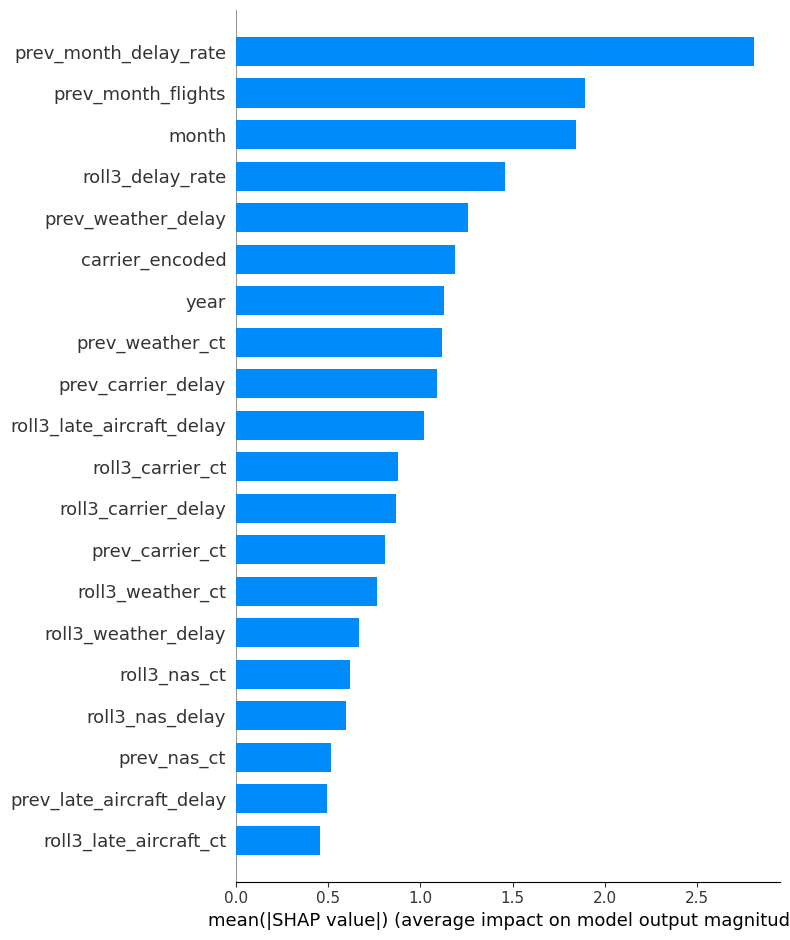

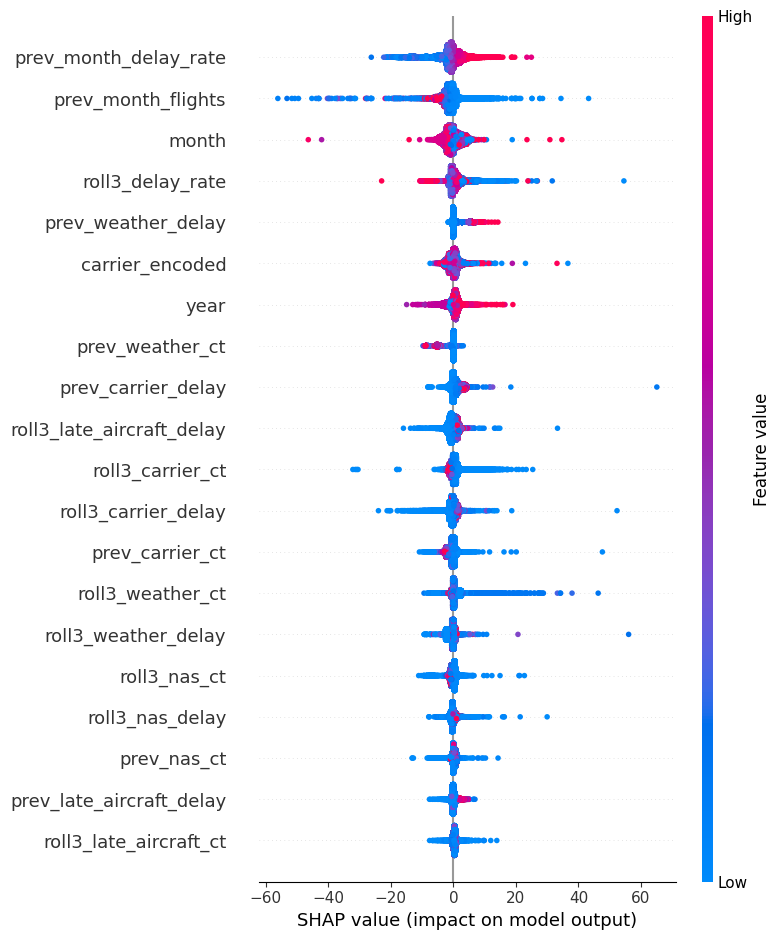

In [ ]:
# SHAP for regression model
explainer_reg = shap.Explainer(reg)  # reg = your trained XGBRegressor
shap_values_reg = explainer_reg(X_test_reg)

# Summary plot: global importance
shap.summary_plot(shap_values_reg, X_test_reg, plot_type="bar", show=True)

# Optional: distribution plot
shap.summary_plot(shap_values_reg, X_test_reg)


#  Using Top features from SHAP

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
# Get mean absolute SHAP values per feature
shap_df_cls = pd.DataFrame(shap_values_cls.values, columns=X_train_cls.columns)
mean_shap_cls = shap_df_cls.abs().mean().sort_values(ascending=False)

# Select top-K features
top_k_cls = 15
top_features_cls = mean_shap_cls.head(top_k_cls).index.tolist()

# Retrain classifier using top features only
X_train_top_cls = X_train_cls[top_features_cls]
X_test_top_cls = X_test_cls[top_features_cls]

clf_top = XGBClassifier(
    eval_metric='aucpr',
    scale_pos_weight=y_train_cls.value_counts()[0] / y_train_cls.value_counts()[1],
    random_state=42
)
clf_top.fit(X_train_top_cls, y_train_cls)

# Evaluate
y_pred_top_cls = clf_top.predict(X_test_top_cls)
y_prob_top_cls = clf_top.predict_proba(X_test_top_cls)[:, 1]

print("Classification Report (Top Features):\n", classification_report(y_test_cls, y_pred_top_cls))

Classification Report (Top Features):
               precision    recall  f1-score   support

           0       0.85      0.76      0.80     21257
           1       0.66      0.77      0.71     12608

    accuracy                           0.77     33865
   macro avg       0.75      0.77      0.76     33865
weighted avg       0.78      0.77      0.77     33865



In [ ]:
# Get mean absolute SHAP values
shap_df_reg = pd.DataFrame(shap_values_reg.values, columns=X_train_reg.columns)
mean_shap_reg = shap_df_reg.abs().mean().sort_values(ascending=False)

# Select top-K features
top_k_reg = 15
top_features_reg = mean_shap_reg.head(top_k_reg).index.tolist()

# Retrain regressor using top features only
X_train_top_reg = X_train_reg[top_features_reg]
X_test_top_reg = X_test_reg[top_features_reg]

reg_top = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42
)
reg_top.fit(X_train_top_reg, y_train_reg)

# Evaluate
y_pred_top_reg = reg_top.predict(X_test_top_reg)

print("\n📈 Regression Evaluation (Top Features):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_top_reg))
print("RMSE:", mean_squared_error(y_test_reg, y_pred_top_reg))
print("R²:", r2_score(y_test_reg, y_pred_top_reg))


📈 Regression Evaluation (Top Features):
MAE: 5.391904544871947
RMSE: 110.9849480541044
R²: 0.16937808156183776


# comparing regression across number of features

    Top_K_Features       MAE        RMSE        R2
0                1  6.263442  117.827104  0.118171
1                2  6.242817  118.156891  0.115703
2                3  5.995452  117.583509  0.119994
3                4  6.009627  205.125236 -0.535177
4                5  5.994931  247.119855 -0.849469
5                6  5.727279  145.127568 -0.086149
6                7  5.433880  195.860479 -0.465838
7                8  5.398151  125.393738  0.061541
8                9  5.425568  200.024343 -0.497001
9               10  5.414461  119.747950  0.103795
10              11  5.470062  185.601432 -0.389059
11              12  5.463931  129.869063  0.028048
12              13  5.490374  126.388120  0.054099
13              14  5.402578  115.056430  0.138907
14              15  5.391905  110.984948  0.169378


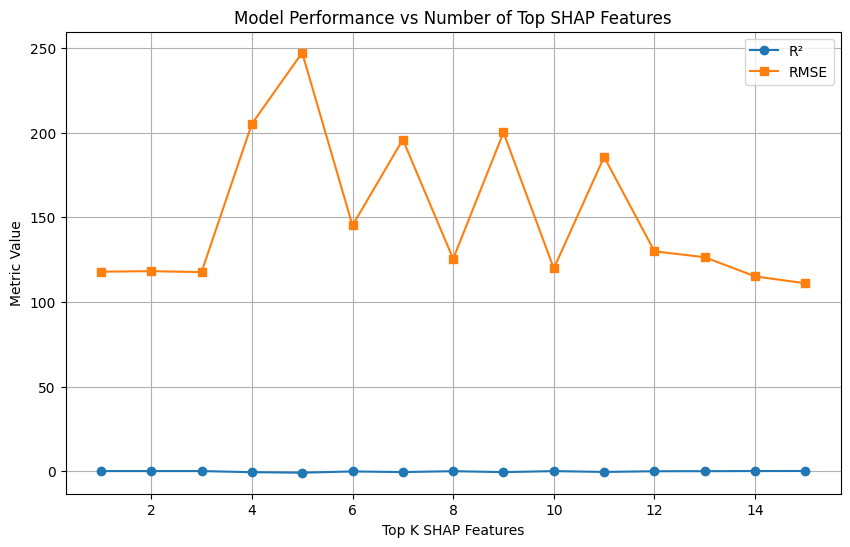

In [ ]:
# 1. Compute mean absolute SHAP values
shap_df_reg = pd.DataFrame(shap_values_reg.values, columns=X_train_reg.columns)
mean_shap_reg = shap_df_reg.abs().mean().sort_values(ascending=False)

# 2. Store results
results = []

# 3. Loop from top 1 to top 15 features
for k in range(1, 16):
    top_k_features = mean_shap_reg.head(k).index.tolist()

    X_train_k = X_train_reg[top_k_features]
    X_test_k = X_test_reg[top_k_features]

    model_k = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        random_state=42
    )
    model_k.fit(X_train_k, y_train_reg)
    y_pred_k = model_k.predict(X_test_k)

    mae = mean_absolute_error(y_test_reg, y_pred_k)
    rmse = mean_squared_error(y_test_reg, y_pred_k)
    r2 = r2_score(y_test_reg, y_pred_k)

    results.append({
        'Top_K_Features': k,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

# 4. Show results
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Plot R² or RMSE vs K
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['Top_K_Features'], results_df['R2'], marker='o', label='R²')
plt.plot(results_df['Top_K_Features'], results_df['RMSE'], marker='s', label='RMSE')
plt.xlabel("Top K SHAP Features")
plt.ylabel("Metric Value")
plt.title("Model Performance vs Number of Top SHAP Features")
plt.legend()
plt.grid(True)
plt.show()

# Trying log loss for regression

In [ ]:
# Transform
monthly_df['log_delay'] = np.log1p(monthly_df['delay_rate_minutes'])

# Use this as target
y_train_log = np.log1p(y_train_reg)
y_test_log = np.log1p(y_test_reg)

# Train
reg_log = XGBRegressor(random_state=42)
reg_log.fit(X_train_top_reg, y_train_log)

# Predict and reverse-transform
y_pred_log = np.expm1(reg_log.predict(X_test_top_reg))

# Evaluate
print("MAE:", mean_absolute_error(y_test_reg, y_pred_log))
print("RMSE:", mean_squared_error(y_test_reg, y_pred_log))
print("R²:", r2_score(y_test_reg, y_pred_log))


MAE: 5.067258323002748
RMSE: 108.6877216389209
R²: 0.18657074277871133


Not much improvement is seen

# Moving to OAI

From problem statement:-
Operational Adjustability Index (OAI) is a custom, weighted delay score that:

Focuses on controllable delays (like carrier_delay, late_aircraft_delay)

De-emphasizes uncontrollable ones (e.g., weather_delay, NAS_delay)

Should be minimized by the model as the main performance goal

OAI = w₁ × carrier_delay + w₂ × late_aircraft_delay + w₃ × other controllable components

Where Higher weights are given to controllable delays


Assigning OAI weights with help of SHAP values :-

In [ ]:
monthly_df['OAI'] = (
    1.0 * monthly_df['carrier_delay'] +
    0.8 * monthly_df['late_aircraft_delay'] +
    0.3 * monthly_df['nas_delay'] +
    0.2 * monthly_df['security_delay'] +
    0.1 * monthly_df['weather_delay']
)


In [ ]:
monthly_df['OAI_per_flight'] = monthly_df['OAI'] / monthly_df['arr_flights']


In [ ]:
monthly_df['prev_OAI'] = (
    monthly_df.groupby(['carrier', 'airport'])['OAI'].shift(1)
)
monthly_df['roll3_OAI'] = (
    monthly_df.groupby(['carrier', 'airport'])['OAI']
    .rolling(3).mean().shift(1).reset_index(level=[0, 1], drop=True)
)


In [ ]:
y_train_oai = X_train_reg.copy()
y_train_oai = monthly_df.loc[X_train_reg.index, 'OAI_per_flight']
y_test_oai = monthly_df.loc[X_test_reg.index, 'OAI_per_flight']

reg_oai = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
reg_oai.fit(X_train_reg, y_train_oai)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_oai = reg_oai.predict(X_test_reg)
print("MAE (OAI):", mean_absolute_error(y_test_oai, y_pred_oai))
print("RMSE (OAI):", mean_squared_error(y_test_oai, y_pred_oai))
print("R² (OAI):", r2_score(y_test_oai, y_pred_oai))


MAE (OAI): 4.125809023831263
RMSE (OAI): 73.54989034685948
R² (OAI): 0.16282486552699138


We can see improvement from previous regression models if we run only on actionable metrics